In [1]:
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import histogram

min pixel value:  33
max pixel value:  214


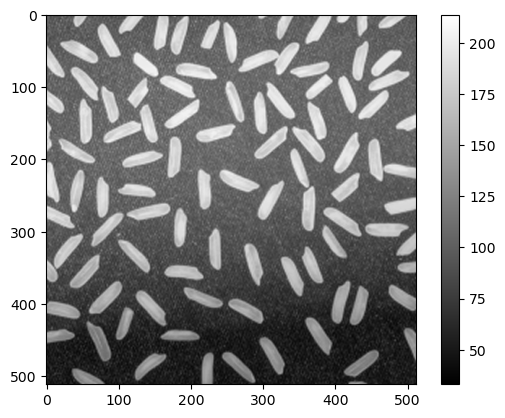

In [2]:
rice = skio.imread("data/rice.tif", plugin="tifffile")
plt.imshow(rice, cmap='gray')
plt.colorbar()
print('min pixel value: ', rice.min())
print('max pixel value: ', rice.max())

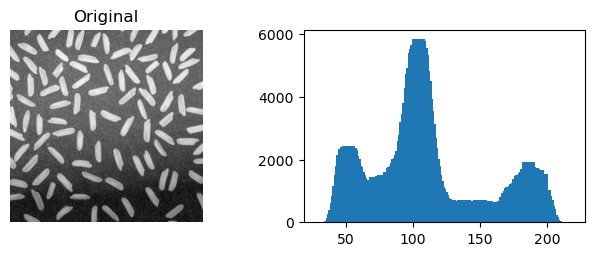

In [3]:

pix_counts, pix_vals = histogram(rice)

fig, axes = plt.subplots(ncols=2,figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(rice, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].bar(pix_vals, pix_counts, width = 10)
plt.show()

can we make the segmentation better? how do we account for uneven illumination, noise, stitching errors, etc. the answer is filtering

In [4]:
from skimage.filters import gaussian, threshold_otsu

Lets use a simple gaussian filter to find backgroun

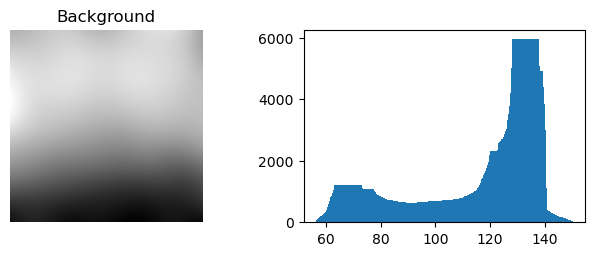

In [5]:
rice_bg = gaussian(rice,sigma=50,preserve_range=True)
pix_counts, pix_vals = histogram(rice_bg)

fig, axes = plt.subplots(ncols=2,figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(rice_bg, cmap=plt.cm.gray)
ax[0].set_title('Background')
ax[0].axis('off')

ax[1].bar(pix_vals, pix_counts, width = 10)
plt.show()

min pixel value:  -58.11170235831236
max pixel value:  86.87791025511821


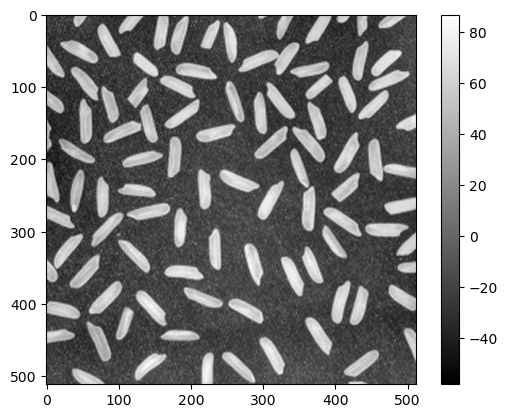

In [12]:
rice_no_bg = rice - rice_bg

plt.imshow(rice_no_bg, cmap='gray')
plt.colorbar()
print('min pixel value: ',rice_no_bg.min())
print('max pixel value: ',rice_no_bg.max())

The value is:  16.93174948262338


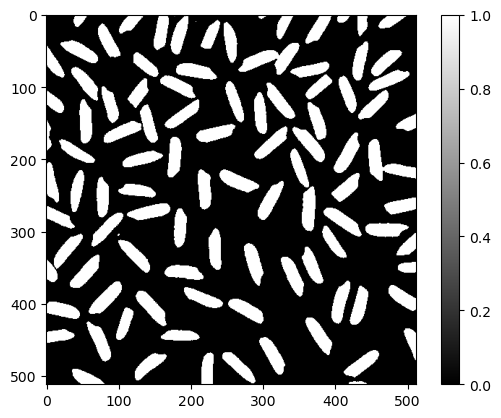

In [13]:
th_val = threshold_otsu(rice_no_bg)
print('The value is: ', th_val)
bw_otsu = rice_no_bg > th_val
plt.imshow(bw_otsu, cmap='gray')
plt.colorbar()

is it really better?

The value is:  131
The value after gaussian filter is:  16.93174948262338


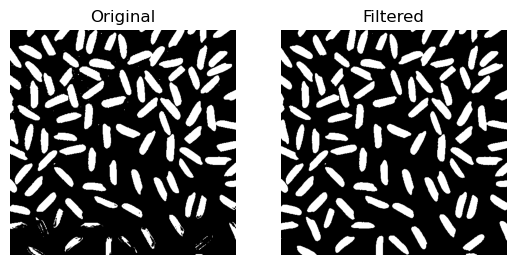

In [14]:
th_val = threshold_otsu(rice)
print('The value is: ', th_val)
bw_otsu = rice > th_val

th_val = threshold_otsu(test)
print('The value after gaussian filter is: ', th_val)
bw_g_otsu = test > th_val

fig, axes = plt.subplots(ncols=2)
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(bw_otsu, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(bw_g_otsu, cmap=plt.cm.gray)
ax[1].set_title('Filtered')
ax[1].axis('off')
plt.show()

Now lets go a bit into quantification

In [9]:
import pandas as pd
from skimage.measure import label, regionprops, regionprops_table
from skimage.segmentation import clear_border
from skimage.morphology import area_opening

a very important concept is that of image labelling or connected component analysis

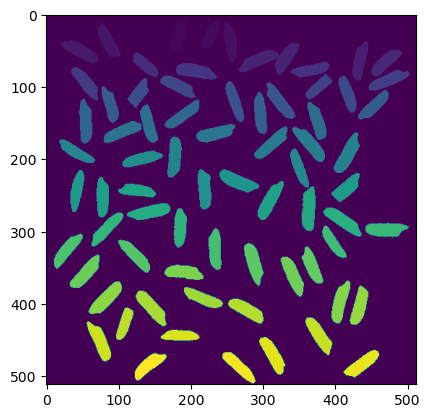

In [10]:
mask = clear_border(bw_g_otsu)
mask = area_opening(mask, area_threshold=200)
lbl = label(mask)
plt.imshow(lbl)

Now we can calculate properties, bot in terms of morphology and intensities

   label  area  eccentricity  intensity_mean
0      1   780      0.949531      181.162821
1      2   567      0.931534      183.857143
2      3   730      0.956889      186.372603
3      4   744      0.940065      184.928763
4      5   828      0.945260      179.920290


array([[<AxesSubplot: title={'center': 'area'}>]], dtype=object)

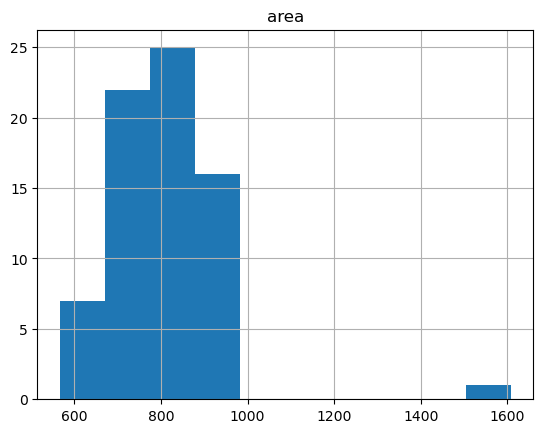

In [11]:
properties = ['label', 'area','eccentricity','intensity_mean']
table = regionprops_table(label_image=lbl, intensity_image=rice, properties=properties)
#tables = [pd.DataFrame(table) for table in tables]
table = pd.DataFrame(table)
print(table.head())
table.hist(column='area')